# INTRO MACHINE LEARNING - RETENTIE

## Import libraries & Data

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import psutil
import sklearn

In [35]:
#usecase: verbanden ontdekken op grote schaal (alle attentia klanten) bv aantal ziektes
#usecase: interne voorstelling
#usecase: ondersteuning interne projecten met retentie als target (attentia kan lijst wel gebruiken?)
#usecase: verkoop van rapport met aantal in te vullen vacancies per functie OF per kostenplaats op halfjaarlijkse basis?
# --> check resultaten model op half jaar voorspelling


allFiles = ['C:\\Users\\WHRM\\ML retentie\\test.csv','C:\\Users\\WHRM\\ML retentie\\NEWDATA-2016B2.csv']
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,sep=';')
    list_.append(df)
frame = pd.concat(list_)
frame.head(5)


,uit,UITMAAND,run,groep,UITKWARTAAL,pkwkn,ab,taal,scholi,regio,geslacht,nat,hierstat,soortloon,aardcont,basisloon,opslag,iopslag,acturen,aantrszd,ziekte,prestatieuren,overuren,AO,ongewettigd,gewettigd,burgst,kindtl,opleidingsuren,thuisuren,aantalwknkpl,gemuit,ggemloon,gemact,aantalwkn,anc,leeftijd,fiets,openb,carpool,eigen,bedrwagen,verantw,ggemprestatie,ggemthuisuren,ggemoveruren,ggemgewettigd,ggemongewettigd,verantwissel,fncwissel,ploeg,afstand,verschilafstand,ggemopslag,ggemleeftijd,ggemanc,ggemafstand,basisuren,ggemziekte,gemvarprestatieuren,gemvarziekte,gemvaroveruren,gemvarthuisuren,gemvaropslag,gemvarleeftijd,gemvaranc,gemvarafstand,vverprestatieuren,vverziekte,vverongewettigd,vvergewettigd,vveroveruren,vverthuisuren,vveropslag,vverleeftijd,vveranc,vverafstand,veraantalwkn,ffncprestatieuren,ffncziekte,ffncongewettigd,ffncgewettigd,ffncoveruren,ffncthuisuren,ffncopslag,ffncleeftijd,ffncanc,ffncafstand,fncaantalwkn,fvarprestatieuren,fvarziekte,fvaroveruren,fvaropslag,fvarleeftijd,fvaranc,fvarafstand,ffncbasisloon,fvarbasisloon,ffncextern,ffncinterim,ggemextern,ggeminterim,catwissel,mutatie,burgstverschil,kindtlverschil,verlof,gemverlof,fncverlof,parcom,tverlet,gemverlet,veruit,random
0,0,0,',393,0,39400020000056,B,N,HS,LIMB,M,B,K,ML,OD,3169.6,0.013708,43.45,37.0,261.0,0.0,1655.5,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN,13.0,0.00,-1748.16,100.00,174,36.919918,58.992471,0.0,0.0,0.0,0.0,0.0,0,113.875385,NaN,NaN,-1.769231,0.0,0.0,NaN,1.0,21.0,0.095238,-0.011409,7.061970,16.202812,-19.253846,37.0,-81.846,240.564,152.077,NaN,NaN,0.030,8.018,10.535,17.661,203.781,-73.947,-0.029,-10.532,NaN,NaN,-0.033,8.173,17.710,-13.394,128,0.000,0.00,0.0,0.0,NaN,NaN,0.000,-0.000,-0.000,0.0,1.0,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,209.0,NaN,NaN,0.062,-1867523421
1,0,0,',393,0,39400020000058,B,N,HK,LIMB,M,B,K,ML,OD,3464.4,0.013711,47.50,37.0,261.0,811.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,NaN,NaN,30.0,3.33,517.83,92.98,174,29.752225,65.757700,NaN,NaN,NaN,NaN,NaN,0,-1439.119762,NaN,NaN,-4.864286,0.0,0.0,NaN,1.0,NaN,0.000000,-0.034104,15.015058,5.997653,NaN,37.0,644.460,455.120,261.784,NaN,NaN,0.103,8.826,8.269,19.776,-1451.719,737.053,-0.029,-10.532,NaN,NaN,-0.033,14.939,10.542,NaN,128,-667.745,257.00,0.0,0.0,NaN,NaN,0.000,2.016,-0.019,NaN,2.0,667.745,257.000,NaN,0.000,2.016,0.019,0.000,-49.000,49.000,NaN,NaN,6.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,209.0,NaN,NaN,0.062,-1259020803
2,0,0,',393,0,39400020000085,B,N,HK,LIMB,V,B,K,ML,OD,3282.6,0.013709,45.00,37.0,522.0,30.0,3408.5,NaN,0.0,0.0,1.0,2.0,1.0,NaN,NaN,9.0,0.00,507.55,22.79,174,22.469541,50.305270,0.0,0.0,0.0,0.0,0.0,0,1683.740000,NaN,NaN,0.666667,0.0,0.0,NaN,1.0,46.0,0.000000,-0.311904,2.633812,9.980379,-5.150000,37.0,20.000,1351.349,14.142,NaN,NaN,0.441,4.825,7.117,5.150,1956.821,-43.947,-0.029,-9.532,NaN,NaN,-0.033,-0.514,3.259,11.606,128,1180.982,-18.80,0.0,0.8,NaN,NaN,0.003,-6.472,-1.127,22.1,5.0,886.282,59.714,NaN,0.005,7.241,10.772,14.691,-201.912,504.817,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,NaN,NaN,NaN,209.0,NaN,NaN,0.062,941575542
3,0,0,',393,0,39400020000093,B,D,HS,LIMB,M,D,K,ML,OD,5584.5,0.013709,76.56,37.0,261.0,95.5,1567.0,NaN,0.0,0.0,0.0,2.0,3.0,NaN,NaN,7.0,0.00,176.97,94.58,174,24.941821,62.455852,0.0,0.0,0.0,0.0,0.0,0,120.290000,NaN,NaN,-8.000000,0.0,0.0,NaN,1.0,34.0,0.000000,-0.026221,7.976924,5.641928,-6.000000,37.0,78.571,368.620,32.521,NaN,NaN,0.070,11.041,9.734,27.737,115.281,21.553,-0.029,-10.532,NaN,NaN,-0.033,11.637,5.732,-0.394,128,0.000,0.00,0.0,0.0,NaN,NaN,0.000,0.000,0.000,0.0,1.0,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,0.0,NaN,0,2.0,NaN,NaN,NaN,209.0,NaN,NaN,0.062,343505372
4,0,0,',393,0,39400020000072,B,N,HS,LIMB,M,B,K,ML,OD,5421.1,0.013709,74.32,37.0,209.0,0.0,1664.0,NaN,0.0,0.0,0.0,2.0,2.0,NaN,NaN,16.0,0.00,1346.33,94.50,174,26.288843,56.884326,0.0,0.0,0.0,0.0,0.0,0,128.643125,NaN,NaN,-9.890625,0.0,0.0,NaN,1.0,45.0,0.000000,-0.057965,9.114476,5.565024,12.437500,37.0,-87.031,227.680,245.008,NaN,NaN,0.128,7.

In [36]:
frame.to_csv('join.csv', sep=';')

In [2]:
df = pd.read_csv('work.csv',sep=';')

In [5]:
train = pd.read_csv('train20132015.csv',sep=';')
test = pd.read_csv('test.csv',sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [144]:
df = test

In [3]:
df.head(5)


,pkwkn,run,uit,aardcont,ab,geslacht,groep,hierstat,nat,regio,...,vveranc,vvergewettigd,vverleeftijd,vverongewettigd,vveropslag,vveroveruren,vverprestatieuren,vverthuisuren,vverziekte,ziekte
0,613100010000130,2013A,0,OD,A,M,6131,A,B,W-VL,...,4.91,-6.76,18.76,-0.09,-0.03,797.41,-3.72,0.0,-50.23,0.00
1,613100010000187,2013A,0,OD,A,M,6131,A,B,W-VL,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,613100010000237,2013A,0,OD,A,M,6131,A,B,W-VL,...,2.81,0.84,-11.44,-0.09,0.02,1488.14,146.07,NaN,50.30,100.53
3,613100010000239,2013A,0,OD,A,M,6131,A,B,W-VL,...,2.81,-6.76,10.86,-0.09,-0.01,892.83,52.93,0.0,187.27,237.50
4,613100010000263,2013A,0,OD,A,M,6131,A,B,W-VL,...,2.41,-6.76,7.16,-0.09,-0.01,4899.54,54.66,0.0,20.34,70.57


In [4]:
pd.set_option('display.max_rows', None)
df.dtypes


pkwkn                    int64
run                     object
uit                      int64
aardcont                object
ab                      object
geslacht                object
groep                    int64
hierstat                object
nat                     object
regio                   object
scholi                  object
taal                    object
aantalwkn                int64
aantrszd               float64
burgst                 float64
burgstverschil           int64
catwissel              float64
fncaantalwkn             int64
fncwissel              float64
kindtl                 float64
kindtlverschil         float64
mutatie                float64
opslag                   int64
parcom                 float64
ploeg                  float64
veraantalwkn             int64
verantw                  int64
aantalwknkpl           float64
actpct                 float64
acturen                float64
anc                    float64
ao                     float64
basisloo

In [147]:
df.drop(df.loc[:,'Unnamed: 0':'Unnamed: 0'], axis=1, inplace=True)


KeyError: 'Unnamed: 0'

In [77]:
B = df.loc[(df['ab']=='B')]
A = df.loc[(df['ab']=='A')]
hr = B

## Check data

In [78]:


col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

Column names:
['pkwkn', 'run', 'uit', 'aardcont', 'ab', 'geslacht', 'groep', 'hierstat', 'nat', 'regio', 'scholi', 'taal', 'aantalwkn', 'aantrszd', 'burgst', 'burgstverschil', 'catwissel', 'fncaantalwkn', 'fncwissel', 'kindtl', 'kindtlverschil', 'mutatie', 'opslag', 'parcom', 'ploeg', 'veraantalwkn', 'verantw', 'aantalwknkpl', 'actpct', 'acturen', 'anc', 'ao', 'basisloon', 'basisuren', 'afstand', 'bedrwagen', 'openb', 'carpool', 'eigen', 'fiets', 'voet', 'ffncafstand', 'ffncanc', 'ffncbasisloon', 'ffncextern', 'ffncgewettigd', 'ffncinterim', 'ffncleeftijd', 'ffncongewettigd', 'ffncopslag', 'ffncoveruren', 'ffncprestatieuren', 'ffncthuisuren', 'ffncziekte', 'fncafstand', 'fncanc', 'fncbasisloon', 'fncgewettigd', 'fncleeftijd', 'fncongewettigd', 'fncopslag', 'fncoveruren', 'fncprestatieuren', 'fncthuisuren', 'fncverlof', 'fncziekte', 'frmmutatie', 'frmontslag', 'frmuit', 'frmverantw', 'frmverlet', 'fvarafstand', 'fvaranc', 'fvarbasisloon', 'fvarleeftijd', 'fvaropslag', 'fvaroveruren', 'f

In [79]:
pd.set_option('display.max_columns', None)
print("\nSample data:")
hr.head(10)


Sample data:


,pkwkn,run,uit,aardcont,ab,geslacht,groep,hierstat,nat,regio,scholi,taal,aantalwkn,aantrszd,burgst,burgstverschil,catwissel,fncaantalwkn,fncwissel,kindtl,kindtlverschil,mutatie,opslag,parcom,ploeg,veraantalwkn,verantw,aantalwknkpl,actpct,acturen,anc,ao,basisloon,basisuren,afstand,bedrwagen,openb,carpool,eigen,fiets,voet,ffncafstand,ffncanc,ffncbasisloon,ffncextern,ffncgewettigd,ffncinterim,ffncleeftijd,ffncongewettigd,ffncopslag,ffncoveruren,ffncprestatieuren,ffncthuisuren,ffncziekte,fncafstand,fncanc,fncbasisloon,fncgewettigd,fncleeftijd,fncongewettigd,fncopslag,fncoveruren,fncprestatieuren,fncthuisuren,fncverlof,fncziekte,frmmutatie,frmontslag,frmuit,frmverantw,frmverlet,fvarafstand,fvaranc,fvarbasisloon,fvarleeftijd,fvaropslag,fvaroveruren,fvarprestatieuren,fvarziekte,gemact,gemafstand,gemanc,gemgewettigd,gemleeftijd,gemloon,gemongewettigd,gemopslag,gemoveruren,gemprestatie,gemthuisuren,gemuit,gemvarafstand,gemvaranc,gemvarleeftijd,gemvaropslag,gemvaroveruren,gemvarprestatieuren,gemvarthuisuren,gemvarziekte,gemverlet,gemverlof,gemziekte,gewettigd,ggemafstand,ggemanc,ggemextern,ggemgewettigd,ggeminterim,ggemleeftijd,ggemloon,ggemongewettigd,ggemopslag,ggemoveruren,ggemprestatie,ggemthuisuren,ggemziekte,iopslag,leeftijd,maxverlof,ongewettigd,opleidingsuren,overuren,prestatieuren,thuisuren,tverlet,verafstand,veranc,verantwissel,vergewettigd,verleeftijd,verongewettigd,veropslag,veroveruren,verprestatieuren,verschilafstand,verthuisuren,veruit,verziekte,vverafstand,vveranc,vvergewettigd,vverleeftijd,vverongewettigd,vveropslag,vveroveruren,vverprestatieuren,vverthuisuren,vverziekte,ziekte
28,613100020000005,2013A,0,OD,B,V,6131,K,B,W-VL,HK,N,390,261.0,2.0,0,0.0,14,0.0,1.0,0.0,NaN,0,226.0,1.0,110,0,41.0,1.00,37.0,22.7,0.0,3007.4,37.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.21,11.34,373.13,NaN,-0.33,NaN,4.25,0.0,-0.0,-8.9,181.3,0.0,30.9,18.2,11.4,2634.2,5.9,39.2,0.0,0.04,40.9,1377.4,0.0,22.8,53.9,0.0,0,0,0,1.5,13.0,6.1,395.0,6.5,0.0,36.9,493.6,147.1,97.57,19.9,12.1,5.4,39.7,2869.17,0.0,0.0,37.1,1446.8,0.0,4.88,13.7,6.0,6.9,0.1,29.7,392.1,0.0,112.4,2.6,22.8,36.7,5.60,-16.92,10.65,NaN,0.15,2.44,3.85,138.20,0.0,-0.00,-5.05,111.95,0.0,48.20,NaN,43.5,26.35,0.0,NaN,32.00,1558.75,0.0,NaN,20.1,11.4,0,6.8,44.3,0.09,0.03,628.6,1405.3,0.00,0.0,0,50.2,-17.06,11.31,-1.16,-0.84,-0.09,0.01,-596.64,153.45,0.0,34.62,84.85
29,613100020000027,2013A,0,OD,B,V,6131,K,B,W-VL,HS,N,390,261.0,2.0,1,0.0,14,0.0,2.0,0.0,0.0,0,226.0,1.0,110,0,41.0,0.80,29.6,19.8,0.0,2573.0,29.6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.21,8.44,-61.21,NaN,-5.93,NaN,-0.35,0.0,-0.0,-13.3,-81.3,0.0,-13.2,18.2,11.4,2634.2,5.9,39.2,0.0,0.04,40.9,1377.4,0.0,22.8,53.9,0.0,0,0,0,1.5,13.0,6.1,395.0,6.5,0.0,36.9,493.6,147.1,97.57,19.9,12.1,5.4,39.7,2869.17,0.0,0.0,37.1,1446.8,0.0,4.88,13.7,6.0,6.9,0.1,29.7,392.1,0.0,112.4,2.6,22.8,36.7,0.00,-14.92,7.75,NaN,-5.45,2.44,-0.75,-296.15,0.0,-0.04,-9.45,-150.70,0.0,4.10,NaN,38.9,24.06,0.0,NaN,27.60,1296.10,0.0,NaN,20.1,11.4,0,6.8,44.3,0.09,0.03,628.6,1405.3,0.00,0.0,0,50.2,-15.06,8.41,-6.76,-5.44,-0.09,-0.03,-601.04,-109.20,0.0,-9.48,40.75
30,613100020000033,2013A,0,OD,B,V,6131,K,B,W-VL,HK,N,390,211.0,2.0,0,0.0,1,0.0,1.0,0.0,NaN,0,226.0,1.0,110,0,41.0,0.80,29.5,20.3,0.0,3164.1,29.5,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0,20.3,3164.1,0.0,44.5,0.0,0.22,24.0,1282.1,0.0,24.4,29.5,0.0,0,0,0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.57,19.9,12.1,5.4,39.7,2869.17,0.0,0.0,37.1,1446.8,0.0,4.88,13.7,6.0,6.9,0.1,29.7,392.1,0.0,112.4,2.6,22.8,36.7,0.00,10.08,8.25,NaN,-5.45,2.44,4.85,294.90,0.0,0.18,-13.05,-164.70,0.0,-7.15,0.0,44.5,24.44,0.0,NaN,24.00,1282.10,0.0,NaN,20.1,11.4,0,6.8,44.3,0.09,0.03,628.6,1405.3,0.00,0.0,0,50.2,9.94,8.91,-6.76,0.16,-0.09,0.19,-604.64,-123.20,0.0,-20.73,29.50
31,613100020000041,2013A,0,OD,B,V,6131,K,B,W-VL,HK,N,390,261.0,2.0,0,0.0,1,1.0,1.0,0.0,NaN,0,226.0,1.0,1,1,5.0,1.00,37.0,23.1,0.0,5468.4,37.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.0,23.1,5468.4,0

In [80]:
#hr.dtypes

#### Dubbele PKWKN

In [81]:
names = hr.pkwkn.value_counts()
print(names.unique())

[1]


In [82]:
#hr.drop(hr.columns[[19]], axis=1, inplace=True)

In [83]:
#hr.dtypes


In [84]:
hr.shape

(13309, 149)

In [85]:
pd.set_option('display.max_rows', None)
hr.isnull().sum(axis=0)

pkwkn                      0
run                        0
uit                        0
aardcont                   0
ab                         0
geslacht                   0
groep                      0
hierstat                   0
nat                        0
regio                      0
scholi                     0
taal                       0
aantalwkn                  0
aantrszd                1696
burgst                   177
burgstverschil             0
catwissel               2666
fncaantalwkn               0
fncwissel               6716
kindtl                  1428
kindtlverschil          1989
mutatie                 7592
opslag                     0
parcom                   224
ploeg                   1696
veraantalwkn               0
verantw                    0
aantalwknkpl              17
actpct                     0
acturen                  148
anc                        0
ao                      1696
basisloon                  0
basisuren                150
afstand       

## Data cleaning

In [86]:
hr=hr[hr['prestatieuren'].notnull()] # Select * from HR where prestatieuren is not null
hr=hr[hr['uit'].notnull()]
hr=hr[hr['burgst'].notnull()]
hr=hr[hr['gemuit'].notnull()]
hr=hr[hr['ggemprestatie'].notnull()]
hr=hr[hr['ffncziekte'].notnull()]
hr=hr[hr['ffncafstand'].notnull()]
hr=hr[hr['fiets'].notnull()]
hr=hr[hr['parcom'].notnull()]
hr=hr[hr['gemverlof'].notnull()]
hr=hr[hr['fncverlof'].notnull()]

In [87]:
hr[hr['uit'].isnull()].head(5)

,pkwkn,run,uit,aardcont,ab,geslacht,groep,hierstat,nat,regio,scholi,taal,aantalwkn,aantrszd,burgst,burgstverschil,catwissel,fncaantalwkn,fncwissel,kindtl,kindtlverschil,mutatie,opslag,parcom,ploeg,veraantalwkn,verantw,aantalwknkpl,actpct,acturen,anc,ao,basisloon,basisuren,afstand,bedrwagen,openb,carpool,eigen,fiets,voet,ffncafstand,ffncanc,ffncbasisloon,ffncextern,ffncgewettigd,ffncinterim,ffncleeftijd,ffncongewettigd,ffncopslag,ffncoveruren,ffncprestatieuren,ffncthuisuren,ffncziekte,fncafstand,fncanc,fncbasisloon,fncgewettigd,fncleeftijd,fncongewettigd,fncopslag,fncoveruren,fncprestatieuren,fncthuisuren,fncverlof,fncziekte,frmmutatie,frmontslag,frmuit,frmverantw,frmverlet,fvarafstand,fvaranc,fvarbasisloon,fvarleeftijd,fvaropslag,fvaroveruren,fvarprestatieuren,fvarziekte,gemact,gemafstand,gemanc,gemgewettigd,gemleeftijd,gemloon,gemongewettigd,gemopslag,gemoveruren,gemprestatie,gemthuisuren,gemuit,gemvarafstand,gemvaranc,gemvarleeftijd,gemvaropslag,gemvaroveruren,gemvarprestatieuren,gemvarthuisuren,gemvarziekte,gemverlet,gemverlof,gemziekte,gewettigd,ggemafstand,ggemanc,ggemextern,ggemgewettigd,ggeminterim,ggemleeftijd,ggemloon,ggemongewettigd,ggemopslag,ggemoveruren,ggemprestatie,ggemthuisuren,ggemziekte,iopslag,leeftijd,maxverlof,ongewettigd,opleidingsuren,overuren,prestatieuren,thuisuren,tverlet,verafstand,veranc,verantwissel,vergewettigd,verleeftijd,verongewettigd,veropslag,veroveruren,verprestatieuren,verschilafstand,verthuisuren,veruit,verziekte,vverafstand,vveranc,vvergewettigd,vverleeftijd,vverongewettigd,vveropslag,vveroveruren,vverprestatieuren,vverthuisuren,vverziekte,ziekte


In [88]:

hr=hr.fillna({'nat':'B','acturen':38, 'basisuren':38}, inplace = True)
hr.fillna(0,inplace = True)


In [89]:
#hr['gemverlof'].replace(['?'], '-1')
#hr['fncverlof'].replace(['?'], '-1')
#hr['fncverlof'].value_counts()

In [90]:
#CLEAN DATA
#hr.max()


In [91]:
#hr=hr[hr['acturen']!=0]
hr=hr[hr['prestatieuren']>0]
hr=hr[hr['basisloon']<25000]
hr=hr[hr['opslag']<2000]
hr=hr[hr['leeftijd']<50]
#hr=hr[hr['burgst']!='!']
#hr=hr[hr['gemopslag']<1000]

#dd= hr

In [92]:
hr.dtypes

pkwkn                    int64
run                     object
uit                      int64
aardcont                object
ab                      object
geslacht                object
groep                    int64
hierstat                object
nat                     object
regio                   object
scholi                  object
taal                    object
aantalwkn                int64
aantrszd               float64
burgst                 float64
burgstverschil           int64
catwissel              float64
fncaantalwkn             int64
fncwissel              float64
kindtl                 float64
kindtlverschil         float64
mutatie                float64
opslag                   int64
parcom                 float64
ploeg                  float64
veraantalwkn             int64
verantw                  int64
aantalwknkpl           float64
actpct                 float64
acturen                float64
anc                    float64
ao                     float64
basisloo

In [93]:
#hr=hr[hr['ab_B']>0]

In [94]:
hr.columns.values

array(['pkwkn', 'run', 'uit', 'aardcont', 'ab', 'geslacht', 'groep',
       'hierstat', 'nat', 'regio', 'scholi', 'taal', 'aantalwkn',
       'aantrszd', 'burgst', 'burgstverschil', 'catwissel', 'fncaantalwkn',
       'fncwissel', 'kindtl', 'kindtlverschil', 'mutatie', 'opslag',
       'parcom', 'ploeg', 'veraantalwkn', 'verantw', 'aantalwknkpl',
       'actpct', 'acturen', 'anc', 'ao', 'basisloon', 'basisuren',
       'afstand', 'bedrwagen', 'openb', 'carpool', 'eigen', 'fiets',
       'voet', 'ffncafstand', 'ffncanc', 'ffncbasisloon', 'ffncextern',
       'ffncgewettigd', 'ffncinterim', 'ffncleeftijd', 'ffncongewettigd',
       'ffncopslag', 'ffncoveruren', 'ffncprestatieuren', 'ffncthuisuren',
       'ffncziekte', 'fncafstand', 'fncanc', 'fncbasisloon',
       'fncgewettigd', 'fncleeftijd', 'fncongewettigd', 'fncopslag',
       'fncoveruren', 'fncprestatieuren', 'fncthuisuren', 'fncverlof',
       'fncziekte', 'frmmutatie', 'frmontslag', 'frmuit', 'frmverantw',
       'frmverlet', '

In [95]:
hr['burgst'].unique()

array([ 2.,  1.,  0.,  4.,  5.,  3.])

In [96]:
hr['uit'].value_counts()

0    5642
1     324
Name: uit, dtype: int64

In [97]:
pd.set_option('display.max_columns', None)
hr.groupby('uit').mean()

,pkwkn,groep,aantalwkn,aantrszd,burgst,burgstverschil,catwissel,fncaantalwkn,fncwissel,kindtl,kindtlverschil,mutatie,opslag,parcom,ploeg,veraantalwkn,verantw,aantalwknkpl,actpct,acturen,anc,ao,basisloon,basisuren,afstand,bedrwagen,openb,carpool,eigen,fiets,voet,ffncafstand,ffncanc,ffncbasisloon,ffncextern,ffncgewettigd,ffncinterim,ffncleeftijd,ffncongewettigd,ffncopslag,ffncoveruren,ffncprestatieuren,ffncthuisuren,ffncziekte,fncafstand,fncanc,fncbasisloon,fncgewettigd,fncleeftijd,fncongewettigd,fncopslag,fncoveruren,fncprestatieuren,fncthuisuren,fncverlof,fncziekte,frmmutatie,frmontslag,frmuit,frmverantw,frmverlet,fvarafstand,fvaranc,fvarbasisloon,fvarleeftijd,fvaropslag,fvaroveruren,fvarprestatieuren,fvarziekte,gemact,gemafstand,gemanc,gemgewettigd,gemleeftijd,gemloon,gemongewettigd,gemopslag,gemoveruren,gemprestatie,gemthuisuren,gemuit,gemvarafstand,gemvaranc,gemvarleeftijd,gemvaropslag,gemvaroveruren,gemvarprestatieuren,gemvarthuisuren,gemvarziekte,gemverlet,gemverlof,gemziekte,gewettigd,ggemafstand,ggemanc,ggemextern,ggemgewettigd,ggeminterim,ggemleeftijd,ggemloon,ggemongewettigd,ggemopslag,ggemoveruren,ggemprestatie,ggemthuisuren,ggemziekte,iopslag,leeftijd,maxverlof,ongewettigd,opleidingsuren,overuren,prestatieuren,thuisuren,tverlet,verafstand,veranc,verantwissel,vergewettigd,verleeftijd,verongewettigd,veropslag,veroveruren,verprestatieuren,verschilafstand,verthuisuren,veruit,verziekte,vverafstand,vveranc,vvergewettigd,vverleeftijd,vverongewettigd,vveropslag,vveroveruren,vverprestatieuren,vverthuisuren,vverziekte,ziekte
uit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.381836e+14,3620.299716,2610.340305,236.592698,1.309642,0.106345,0.147465,34.882843,0.086494,1.011698,0.013116,0.049982,0.024105,242.195902,1.0,769.026764,0.128501,43.761432,0.933626,34.775452,12.641865,2.159429,3168.501595,35.162088,24.120631,9.294612,1.510035,0.153704,0.0,0.450815,0.0,-0.171549,-1.217854,-39.094674,0.639241,0.282430,5.162731,-2.139807,-0.099908,-0.002836,3.782613,-1.422244,-0.630308,-1.949840,24.290464,13.863240,3207.595250,5.513878,40.805672,0.440321,0.066528,186.057745,1381.893495,8.977366,22.855300,57.145409,0.004254,0.0,0.000000,0.000177,1.581850,9.234757,4.377880,233.804555,4.950939,0.055689,63.692201,198.659518,67.091227,90.447625,24.055565,14.969390,5.595019,42.349362,3175.734094,0.472138,0.061078,215.561432,1365.151719,9.282630,7.329201,14.638816,7.530787,7.704626,0.074672,166.397005,298.285236,12.141546,91.297572,1.098724,23.380131,60.971305,5.796624,0.063547,-2.327627,0.955597,0.20073,14.163894,-3.680372,-7.233866,-0.131751,-0.004872,-5.827253,15.320539,-0.572611,-5.773926,0.009341,38.666324,21.604885,0.340413,2.916351,184.832006,1380.470702,7.643603,0.189089,22.571464,15.561893,0.143921,6.010032,43.372687,0.515796,0.073330,328.387717,1340.188497,-0.232021,10.841974,0.0,76.316484,1.548830,-2.914752,-0.214075,-4.717189,-0.175383,-0.010775,-49.545773,40.287962,-2.325533,-21.111689,55.196117
1,4.710555e+14,3994.271605,2512.666667,208.219136,1.240741,0.018519,0.163580,46.290123,0.067901,0.648148,0.006173,0.000000,0.074074,241.377284,1.0,756.709877,0.046296,38.333333,0.896636,33.224074,9.983951,2.308333,2958.462963,33.315432,25.808951,10.129012,2.707778,0.169753,0.0,0.540741,0.0,0.279722,-1.591790,-93.718457,0.870895,-0.281883,8.415556,-3.970926,0.371019,0.008333,6.441667,-49.542593,0.079938,-12.037654,25.529630,11.575926,3052.180556,6.190741,39.340741,0.457963,0.082037,76.966358,1265.762654,5.520062,20.043519,61.777469,0.003086,0.0,0.003086,0.000000,1.514815,10.016667,4.453395,222.080247,5.399074,0.064506,20.999383,226.515432,77.680864,89.208580,24.481173,12.518827,6.589815,40.650617,2932.275062,0.480247,0.076235,92.849383,1253.545062,5.034877,10.031111,14.236728,6.256790,7.129321,0.076852,68.853086,310.096914,6.266049,86.233025,1.060802,20.376852,58.064198,5.909198,1.326605,-2.536512,0.568210,-0.67929,16.731759,-5.274105,26.185710,0.348

In [98]:
pd.set_option('display.max_columns', 12)

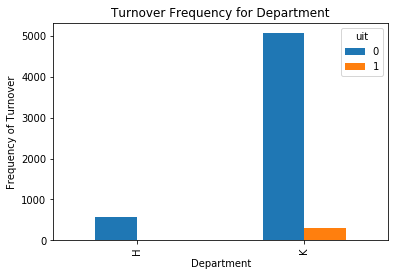

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.hierstat,hr.uit).plot(kind='bar', stacked= False)
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

In [100]:
hr.columns.values

array(['pkwkn', 'run', 'uit', 'aardcont', 'ab', 'geslacht', 'groep',
       'hierstat', 'nat', 'regio', 'scholi', 'taal', 'aantalwkn',
       'aantrszd', 'burgst', 'burgstverschil', 'catwissel', 'fncaantalwkn',
       'fncwissel', 'kindtl', 'kindtlverschil', 'mutatie', 'opslag',
       'parcom', 'ploeg', 'veraantalwkn', 'verantw', 'aantalwknkpl',
       'actpct', 'acturen', 'anc', 'ao', 'basisloon', 'basisuren',
       'afstand', 'bedrwagen', 'openb', 'carpool', 'eigen', 'fiets',
       'voet', 'ffncafstand', 'ffncanc', 'ffncbasisloon', 'ffncextern',
       'ffncgewettigd', 'ffncinterim', 'ffncleeftijd', 'ffncongewettigd',
       'ffncopslag', 'ffncoveruren', 'ffncprestatieuren', 'ffncthuisuren',
       'ffncziekte', 'fncafstand', 'fncanc', 'fncbasisloon',
       'fncgewettigd', 'fncleeftijd', 'fncongewettigd', 'fncopslag',
       'fncoveruren', 'fncprestatieuren', 'fncthuisuren', 'fncverlof',
       'fncziekte', 'frmmutatie', 'frmontslag', 'frmuit', 'frmverantw',
       'frmverlet', '

In [101]:
cat_vars=['aardcont', 'ab', 'geslacht', 'groep',
       'hierstat', 'nat', 'regio', 'scholi', 'taal']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [102]:
#hr.drop( axis=1, inplace=True)
hr.drop(hr.loc[:,'pkwkn':'run'], axis=1, inplace=True)
hr.drop(hr.loc[:,'aardcont':'taal'], axis=1, inplace=True)
#hr.drop(hr.loc['burgst'], axis=1, inplace=True)

In [76]:
#hr.drop(hr.loc[:,'burgst':'burgst'], axis=1, inplace=True)

In [174]:
#hr.to_csv('work.csv', sep=';')

In [175]:
#hr['burgst'] = pd.to_numeric(hr['burgst'], errors='coerce')

In [104]:
#hr.drop(hr.loc[:,'verlof':'verlof'], axis=1, inplace=True)
#hr.drop(hr.loc[:,'fncverlof':'fncverlof'], axis=1, inplace=True)

In [105]:


hr_vars=hr.columns.values.tolist()
y=['uit']
no = ['UITMAAND','UITKWARTAAL']
X=[i for i in hr_vars if i not in y and i not in no] # SELECT KOLOMNAAM FROM HR_VARS WHERE KOLOMNAAM != Y




## Random forest model training

### Select features

In [106]:
#X=hr[cols]

X=hr[X] # Select X from HR
y=hr['uit']

In [107]:
X.shape

(5966, 290)

### Cross validation

In [109]:
#X.drop(X.loc[:,'random':'random'], axis=1, inplace=True)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16, stratify = y)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Build and train model

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60, max_depth=16, max_features=20, min_samples_leaf = 110,min_samples_split=50,
                            bootstrap=True,
                            n_jobs=3, verbose=0, criterion = 'entropy', oob_score = True, class_weight ={1:1.9}
)
rf.fit(X_train, y_train)
#n_estimators=15, max_depth=15, max_features=20, min_samples_leaf = 80,min_samples_split=60

RandomForestClassifier(bootstrap=True, class_weight={1: 1.9},
            criterion='entropy', max_depth=16, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=110,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=3, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

### Model validation

In [111]:
from sklearn.metrics import accuracy_score
Xt = rf.predict(X_test)
accuracy_score(y_test, Xt)*100

94.639865996649917

##### confusion matrix

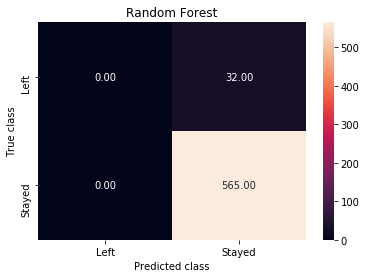

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = confusion_matrix(y_test,y_pred, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       565
          1       0.00      0.00      0.00        32

avg / total       0.90      0.95      0.92       597



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
y_series=pd.Series(y_pred)
print("predicted")
print(y_series.value_counts())
print("True")
print(y_test.value_counts())
print("Total: %d" %y_test.shape)


predicted
0    597
dtype: int64
True
0    565
1     32
Name: uit, dtype: int64
Total: 597


## Feature importance

In [115]:
#im = (rf.feature_importances_*100).tolist()
rank = (rf.feature_importances_*100).tolist()
hr_param=X.columns.values
imp = pd.DataFrame(
    {'param': hr_param,
     'ranking': rank
    })
imp.sort_values(by=['ranking'], ascending=False)


,param,ranking
129,vverleeftijd,5.821875
18,anc,5.780887
69,gemanc,5.286240
127,vveranc,4.090105
88,gemverlof,3.436857
43,fncanc,3.339418
71,gemleeftijd,3.046507
106,maxverlof,2.430990
105,leeftijd,2.188553
96,ggemleeftijd,1.945718


###### Select 75 most important features --> input in X --> hr[X] --> return to cross validation

In [52]:
sort = imp.sort_values(by=['ranking'], ascending=False).head(85)
features = sort['param']
X= hr[features]
pd.set_option('display.max_columns', None)
X.head(5)

,veruit,anc,vveranc,gemuit,mutatie,leeftijd,veraantalwkn,vverleeftijd,kindtl,gemvaranc,vverziekte,verantw,burgstverschil,ggemziekte,ggemanc,basisloon,ziekte,vverprestatieuren,vveropslag,gemverlof,aantalwkn,vverafstand,ggemloon,ggemprestatie,basisuren,vvergewettigd,aantalwknkpl,prestatieuren,gemvarafstand,gemvarprestatieuren,groep,ffncziekte,gemvarleeftijd,gemvaroveruren,ggemleeftijd,acturen,opslag,gemvaropslag,random,gemact,gemvarziekte,fvaranc,ggemgewettigd,ggemopslag,ggemafstand,fvarprestatieuren,ffncanc,fncaantalwkn,parcom,vverongewettigd,ffncprestatieuren,vveroveruren,afstand,ffncbasisloon,fvarafstand,iopslag,fvarziekte,fvarbasisloon,ffncgewettigd,ffncleeftijd,overuren,ffncafstand,fvaropslag,fvarleeftijd,fvaroveruren,bedrwagen,ffncopslag,ggemoveruren,aantrszd,gewettigd,regio_BRAB,vverthuisuren,verschilafstand,burgst_1.0,gemvarthuisuren,ffncoveruren,scholi_NO,scholi_HS,hierstat_K,scholi_UN,ffncongewettigd,taal_F,geslacht_V,ggemongewettigd,opleidingsuren
94,0.0,27.540041,11.879,2.78,0.0,49.839836,85,6.776,2.0,8.927,1014.391,0,0,993.020,13.090264,3561.7,1125.0,-767.166,-0.064,19.012,100,-9.774,489.04,-757.640208,36.0,-4.911,36.0,557.5,30.227,369.762,2762,932.275,10.081,124.368,9.210130,36.0,0.000000,0.090,-1789076293,95.83,220.726,4.644,-4.888125,-0.038985,-19.125000,321.624,13.465,34.0,218.0,-0.854,-727.260,-103.126,30.0,449.032,28.873,81.78,286.25,178.487,-4.468,8.883,92.2,-20.588,0.12,7.935,65.128,0.0,-0.048,-111.023229,239.0,0.0,1,-74.847,0.166667,0,47.931,-73.565,0,1,1,0,-0.581,1,0,-0.617188,0.0
98,0.0,21.705681,6.045,3.45,0.0,48.167009,85,5.103,0.0,7.744,1068.391,0,0,999.794,6.624170,3374.5,1179.0,-682.072,-0.064,19.125,100,33.226,307.17,-647.931304,36.0,-4.911,29.0,642.6,25.734,298.629,2762,986.275,8.704,113.780,7.029849,18.0,0.000000,0.113,-200317756,79.05,261.054,4.644,-7.413478,-0.053173,27.608696,321.624,7.630,34.0,218.0,-0.854,-642.167,-130.346,73.0,261.892,28.873,63.53,286.25,178.487,-4.468,7.210,65.0,22.412,0.12,7.935,65.128,0.0,-0.048,-125.485797,208.0,0.0,1,-91.847,0.493151,0,40.096,-100.785,1,0,1,0,-0.581,1,0,-1.252174,0.0
101,0.0,17.043121,1.382,2.78,0.0,41.927447,85,-1.137,1.0,8.927,-74.609,0,0,-95.980,2.593344,3249.8,36.0,-623.992,0.457,19.012,100,35.226,177.17,-614.466875,36.0,-4.911,36.0,700.6,30.227,369.762,2762,-156.725,10.081,124.368,1.297741,18.0,0.520864,0.090,-1091635,95.83,220.726,4.644,-4.888125,0.481880,25.875000,321.624,2.968,34.0,218.0,-0.854,-584.087,-113.346,75.0,137.162,28.873,0.00,286.25,178.487,-4.468,0.971,82.0,24.412,0.12,7.935,65.128,0.0,0.473,-121.243229,104.0,0.0,1,-76.847,0.000000,0,47.931,-83.785,1,0,1,0,-0.581,1,0,-0.617188,0.0
102,0.0,17.371663,1.711,2.78,0.0,38.770705,85,-4.293,2.0,8.927,-47.609,0,0,-68.980,2.921886,3249.8,63.0,249.918,-0.022,19.012,100,32.226,177.17,259.443125,36.0,-4.911,36.0,1574.5,30.227,369.762,2762,-129.725,10.081,124.368,-1.859001,36.0,0.041729,0.090,-2138863497,95.83,220.726,4.644,-4.888125,0.002744,22.875000,321.624,3.296,34.0,218.0,-0.854,289.823,-2.346,72.0,137.162,28.873,0.00,286.25,178.487,-4.468,-2.186,193.0,21.412,0.12,7.935,65.128,0.0,-0.006,-10.243229,209.0,0.0,1,25.153,0.000000,0,47.931,27.215,0,1,1,0,-0.581,1,0,-0.617188,9.0
103,0.0,18.625599,2.965,3.45,0.0,42.417522,85,-0.646,1.0,7.744,151.751,0,0,83.154,3.544088,3640.0,262.4,32.858,-0.016,19.125,100,1.226,572.63,66.998696,36.0,-4.911,29.0,1357.5,25.734,298.629,2762,0.000,8.704,113.780,1.280362,36.0,0.047574,0.113,-318070766,79.05,261.054,0.000,-7.413478,-0.005599,-4.391304,0.000,-0.000,1.0,218.0,-0.854,0.000,8.154,41.0,0.000,0.000,0.00,0.00,0.000,0.000,-0.000,203.5,0.000,0.00,0.000,0.000,0.0,0.000,13.014203,208.0,0.0,1,3.153,-0.341463,0,40.096,0.000,0,0,1,0,0.000,1,0,-1.252174,0.0


In [69]:
# neg effect test
X = X[X.columns.drop(list(X.filter(regex='ggemprestatie')))]
X = X[X.columns.drop(list(X.filter(regex='vverziekte')))]
#X = X[X.columns.drop(list(X.filter(regex='ggemafstand')))]
X = X[X.columns.drop(list(X.filter(regex='ggemgewettigd')))]
X = X[X.columns.drop(list(X.filter(regex='vveropslag')))]
X = X[X.columns.drop(list(X.filter(regex='ggemleeftijd')))]
X = X[X.columns.drop(list(X.filter(regex='ggemanc')))]
#X = X[X.columns.drop(list(X.filter(regex='vverprestatieuren')))]
X = X[X.columns.drop(list(X.filter(regex='vverafstand')))]
#X = X[X.columns.drop(list(X.filter(regex='ggemoveruren')))]
X = X[X.columns.drop(list(X.filter(regex='ggemthuisuren')))]
X = X[X.columns.drop(list(X.filter(regex='vveroveruren')))]
#X = X[X.columns.drop(list(X.filter(regex='vverziekte')))]


In [180]:
X = X[X.columns.drop(list(X.filter(regex='vver*')))]
X = X[X.columns.drop(list(X.filter(regex='veraantalwkn')))]
X = X[X.columns.drop(list(X.filter(regex='random')))]

In [114]:

X = X[X.columns.drop(list(X.filter(regex='fvaroveruren')))]
X = X[X.columns.drop(list(X.filter(regex='ffncthuisuren')))]
X = X[X.columns.drop(list(X.filter(regex='ffncafstand')))]
X = X[X.columns.drop(list(X.filter(regex='ffncleeftijd')))]
X = X[X.columns.drop(list(X.filter(regex='ffncanc')))]
X = X[X.columns.drop(list(X.filter(regex='ffncprestatieuren')))]
X = X[X.columns.drop(list(X.filter(regex='ffncbasisloon')))]
X = X[X.columns.drop(list(X.filter(regex='ffncziekte')))]
X = X[X.columns.drop(list(X.filter(regex='ffncgewettigd')))]
X = X[X.columns.drop(list(X.filter(regex='fvarbasisloon')))]
X = X[X.columns.drop(list(X.filter(regex='fvarafstand')))]
X = X[X.columns.drop(list(X.filter(regex='ffncopslag')))]
X = X[X.columns.drop(list(X.filter(regex='fvarprestatieuren')))]
X = X[X.columns.drop(list(X.filter(regex='fvarziekte')))]
X = X[X.columns.drop(list(X.filter(regex='fvaranc')))]
X = X[X.columns.drop(list(X.filter(regex='fvar*')))]
X = X[X.columns.drop(list(X.filter(regex='ffnc*')))]


In [123]:
hr.groupby('uit').mean()

,basisloon,opslag,acturen,aantrszd,ziekte,prestatieuren,overuren,AO,ongewettigd,gewettigd,kindtl,opleidingsuren,thuisuren,aantalwknkpl,gemuit,ggemloon,gemact,aantalwkn,anc,leeftijd,fiets,openb,carpool,eigen,bedrwagen,verantw,ggemprestatie,ggemthuisuren,ggemoveruren,ggemgewettigd,ggemongewettigd,verantwissel,fncwissel,ploeg,afstand,verschilafstand,ggemopslag,ggemleeftijd,ggemanc,ggemafstand,basisuren,ggemziekte,gemvarprestatieuren,gemvarziekte,gemvaroveruren,gemvarthuisuren,gemvaropslag,gemvarleeftijd,gemvaranc,gemvarafstand,vverprestatieuren,vverziekte,vverongewettigd,vvergewettigd,vveroveruren,vverthuisuren,vveropslag,vverleeftijd,vveranc,vverafstand,veraantalwkn,ffncprestatieuren,ffncziekte,ffncongewettigd,ffncgewettigd,ffncoveruren,ffncthuisuren,ffncopslag,ffncleeftijd,ffncanc,ffncafstand,fncaantalwkn,fvarprestatieuren,fvarziekte,fvaroveruren,fvaropslag,fvarleeftijd,fvaranc,fvarafstand,ffncbasisloon,fvarbasisloon,ffncextern,ffncinterim,ggemextern,ggeminterim,catwissel,mutatie,burgstverschil,kindtlverschil,gemverlof,parcom,ab_B,taal_D,taal_F,taal_N,scholi_7J,scholi_HK,scholi_HS,scholi_NO,scholi_SL,scholi_TS,scholi_UN,regio_0,regio_ANTW,regio_BRAB,regio_BRAV,regio_BRAW,regio_BRUX,regio_HENE,regio_LIMB,regio_LUIK,regio_LUXB,regio_LVWS,regio_O-VL,regio_W-VL,geslacht_M,geslacht_V,hierstat_H,hierstat_K,soortloon_ML,soortloon_UL,burgst_0.0,burgst_1.0,burgst_2.0,burgst_3.0,burgst_4.0,burgst_5.0,burgst_10.0,aardcont_BD,aardcont_OD
uit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3584.807591,0.064974,35.617719,239.430762,55.708828,1433.674926,139.070508,1.703686,0.105242,5.757101,1.167912,9.143077,14.334713,63.548656,6.460487,-38.967760,92.762352,3640.369287,14.966465,43.086078,0.996762,1.002830,0.438580,0.0,10.786957,0.143033,21.544743,0.300794,-7.854704,-0.355296,-0.030435,0.151512,0.119422,1.0,27.417501,-0.382001,0.008180,-0.571438,-0.341870,0.122765,36.287625,-4.64061,298.319665,100.496437,153.491372,15.609809,0.085811,7.707766,7.574160,17.739199,47.858918,-18.511900,-0.096391,-1.188748,-54.065064,-0.002757,0.014174,-0.832622,-0.565762,1.311909,1424.074129,21.906025,-0.723070,-0.018900,-0.015573,3.290185,0.261683,0.002846,-0.578119,-0.485976,0.065587,52.222682,181.512363,59.955504,69.309558,0.035328,4.463577,4.195455,10.305480,-9.246228,331.030324,4.055211,70.707238,3.356648,16.505906,0.136778,0.039295,0.051884,0.023924,25.385945,236.600700,1.0,0.000239,0.269562,0.730199,0.000031,0.240976,0.205970,0.238783,0.030418,0.000006,0.283818,0.210834,0.170920,0.303833,0.001605,0.000398,0.000282,0.027740,0.034443,0.038523,0.000098,0.008730,0.121241,0.081352,0.617731,0.382269,0.079704,0.920296,0.998995,0.001005,0.176152,0.275817,0.474600,0.004301,0.058274,0.010831,0.000025,0.019629,0.980371
1,3369.835896,0.053660,35.664477,228.835705,78.922804,1351.063293,111.220292,2.159100,0.326996,8.583155,0.854851,7.358279,12.889037,71.250859,10.112700,-128.665675,92.964611,3304.306054,9.615876,38.482459,0.731362,1.810936,0.414316,0.0,11.986112,0.089668,-27.915380,-0.093325,-9.871041,1.654058,0.103099,0.162338,0.109053,1.0,29.072594,-0.363425,0.006534,-3.080430,-3.007884,1.862008,36.071943,15.35215,314.169259,99.589838,124.647950,13.201426,0.081628,7.410004,6.690406,17.151966,-15.578633,1.675071,0.000211,0.964185,-80.656858,-1.425805,0.011144,-4.563517,-4.547193,3.254920,1331.059778,-10.187216,12.314487,0.077393,1.573167,-2.173712,0.164784,0.001208,-2.193935,-2.002710,1.236691,52.690604,203.282156,66.060232,60.427654,0.037196,4.390640,3.674984,10.490687,-66.760366,316.792211,5.661287,86.251623,4.990164,14.454354,0.131684,0.002101,0.024160,0.005921,23.915577,236.480363,1.0,0.000382,0.233957,0.765661,0.000000,0.208174,0.143048,0.314362,0.017762,0.000000,0.316654,0.209893,0.180386,0.353992,0.001910,0.001050,0.000382,0.022059,0.035905,0.015661,0.000286,0.008021,0.107429,0.063025,0.572383,0.427617,0.063885,0.936115,0.998950,0.001050,0.186115,0.392284,0.367552,0.002101,0.04

In [124]:
X.head()

,anc,vveranc,gemuit,leeftijd,vverleeftijd,ggemanc,gemverlof,basisloon,ggemziekte,ggemloon,ggemleeftijd,vverprestatieuren,gemvaranc,vverziekte,gemvarafstand,ggemafstand,prestatieuren,gemvarleeftijd,ggemprestatie,ggemopslag,ggemgewettigd,opslag,vvergewettigd,aantalwkn,vverafstand,gemvarprestatieuren,gemvarziekte,vveropslag,gemvaroveruren,gemact,mutatie,afstand,aantalwknkpl,ziekte,gemvaropslag,veraantalwkn,vveroveruren,vverongewettigd,overuren,ggemoveruren,aantrszd,bedrwagen,basisuren,kindtl,acturen,parcom,fncaantalwkn,verschilafstand,vverthuisuren,gewettigd,regio_BRAB,gemvarthuisuren,burgstverschil,ggemthuisuren,scholi_NO,opleidingsuren,ggemextern,ggemongewettigd,burgst_2.0,scholi_UN,ggeminterim,burgst_1.0,geslacht_V,thuisuren,geslacht_M,burgst_0.0,scholi_HS,scholi_HK,taal_F,taal_N,regio_0,openb,fiets,catwissel,verantwissel,regio_O-VL,hierstat_K,hierstat_H,regio_LUIK,regio_ANTW,aardcont_BD,regio_LIMB,fncwissel,aardcont_OD,regio_HENE,verantw,regio_W-VL,burgst_4.0,AO,ongewettigd,carpool,scholi_SL,burgst_5.0,regio_LVWS
73,36.602327,22.804,0.00,54.464066,13.601,15.135524,20.250,4032.2,-74.314,559.17,7.413758,352.913,9.108,-131.326,29.685,-25.250000,1633.0,9.234,277.330417,-0.015812,-4.275000,0.010096,-9.709,102,-33.44,273.821,98.797,-0.020,101.365,91.25,0.0,7.0,8.0,0.0,0.012,85,12.835,-2.106,206.5,-72.840000,212.0,0.0,36.0,0.0,36.0,218.0,1.0,0.000000,28.083,0.0,1,28.573,0,23.25,0,4.0,0.0,0.000000,0,0,0.0,1,1,183.0,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0.0,0.0,0.0,0,0,0
75,25.853525,12.055,2.56,52.791239,11.929,15.202491,19.444,5075.1,-83.806,2003.97,16.499525,307.263,6.499,-131.326,33.828,-26.451613,1587.3,9.280,356.458495,-0.000985,-9.757527,0.032366,-9.709,102,-15.44,435.789,105.862,0.002,168.044,97.44,0.0,25.0,39.0,0.0,0.043,85,-6.015,-2.106,187.7,-3.188889,210.0,0.0,36.0,3.0,36.0,218.0,3.0,0.000000,25.083,0.0,1,51.247,1,25.20,0,0.0,0.0,-2.935484,0,0,0.0,0,0,180.0,1,0,1,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0.0,1,0,0,0,1,0.0,0.0,0.0,0,0,0
76,25.768652,11.970,0.00,51.381246,10.519,4.301848,20.250,4085.6,-15.384,612.55,4.330938,214.493,9.108,-72.396,29.685,9.750000,1494.6,9.234,138.910417,0.008778,-4.275000,0.034685,-9.709,102,1.56,273.821,98.797,0.004,101.365,91.25,0.0,42.0,8.0,58.9,0.012,85,219.295,-2.106,413.0,133.620000,208.0,0.0,36.0,2.0,36.0,218.0,4.0,0.047619,17.083,0.0,1,28.573,0,12.25,0,0.0,0.0,0.000000,0,0,0.0,0,0,172.0,1,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0.0,1,0,0,0,1,0.0,0.0,0.0,0,0,0
77,25.349760,11.551,0.00,53.653662,12.791,3.882957,20.250,3323.2,-74.314,-149.85,6.603354,306.083,9.108,-131.326,29.685,-17.250000,1586.2,9.234,230.500417,-0.015812,-4.275000,0.010096,-9.709,102,-25.44,273.821,98.797,-0.020,101.365,91.25,0.0,15.0,8.0,0.0,0.012,85,-8.835,-2.106,184.8,-94.510000,208.0,0.0,36.0,1.0,36.0,218.0,4.0,0.000000,24.083,0.0,1,28.573,0,19.25,0,0.0,0.0,0.000000,0,0,0.0,0,1,179.0,0,1,1,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0.0,0.0,0.0,0,0,0
78,22.518823,8.720,0.00,52.314853,11.452,7.775770,21.000,3552.1,-8.625,268.55,-0.636003,319.773,8.438,-115.326,38.181,-34.555556,1599.8,7.954,77.518667,-0.027027,-1.920000,0.010098,-9.709,102,-36.44,118.869,28.557,-0.020,49.989,89.09,0.0,4.0,11.0,16.0,0.052,85,7.325,-2.106,201.0,-25.574000,235.0,0.0,36.0,2.0,36.0,218.0,8.0,0.000000,46.083,0.0,1,9.266,0,3.50,0,8.0,0.0,0.000000,1,0,0.0,0,0,201.0,1,0,1,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0.0,0.0,0.0,0,0,0


In [184]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf).fit(X_test, y_test)
eli5.explain_weights(perm)

ModuleNotFoundError: No module named 'display'

In [179]:
X_test.columns.values.tolist()

array(['veruit', 'anc', 'gemuit', 'leeftijd', 'mutatie', 'kindtl',
       'verantw', 'gemvaranc', 'ggemanc', 'ggemziekte', 'ziekte',
       'basisloon', 'gemverlof', 'basisuren', 'ggemloon', 'burgstverschil',
       'aantalwkn', 'acturen', 'prestatieuren', 'ggemleeftijd',
       'gemvarleeftijd', 'ggemprestatie', 'aantalwknkpl',
       'gemvarprestatieuren', 'groep', 'gemvaroveruren', 'gemvarafstand',
       'opslag', 'gemvarziekte', 'gemact', 'ffncanc', 'ggemgewettigd',
       'ffncziekte', 'gemvaropslag', 'ggemafstand', 'afstand', 'iopslag',
       'ggemopslag', 'fvaranc', 'fvarafstand', 'fvarprestatieuren',
       'ffncprestatieuren', 'overuren', 'ffncbasisloon', 'fncaantalwkn',
       'ffncleeftijd', 'fvarbasisloon', 'fvarziekte', 'parcom',
       'fvaropslag', 'ffncafstand', 'fvarleeftijd', 'fvaroveruren',
       'aantrszd', 'bedrwagen', 'ffncopslag', 'ffncgewettigd', 'gewettigd',
       'ggemoveruren', 'scholi_NO', 'regio_BRAB', 'ffncoveruren',
       'burgst_1.0', 'gemvarthuisur

In [188]:
X_test = X
imps = eli5.explain_weights_df(perm, top=150, feature_names = X_test.columns.values.tolist())
imps

,feature,weight,std
0,veruit,1.096519e-02,0.000157
1,verantw,7.529012e-04,0.000052
2,mutatie,1.075573e-04,0.000055
3,leeftijd,9.057458e-05,0.000107
4,basisloon,8.491367e-05,0.000047
5,fvaranc,6.227003e-05,0.000021
6,basisuren,6.227003e-05,0.000042
7,regio_BRAB,5.660911e-05,0.000000
8,fvaropslag,5.094820e-05,0.000021
9,opslag,4.528729e-05,0.000023


### FEATURE SELECTION LIKE A PRO


In [259]:
import eli5

for i in range(1, 1+(20//5)) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16, stratify = y)
    rf.fit(X_train, y_train)
    perm = PermutationImportance(rf).fit(X_test, y_test)
    imp = eli5.explain_weights_df(perm, feature_names = X.columns.values.tolist())
    sort = imp.sort_values(by=['weight'], ascending=False).head(len(hr.columns)-5*i)
    features = sort['feature']
    X= hr[features]
print('ready')




ready


In [253]:
len(X.columns.values.tolist())

64

### confusion matrix on trained data (check overfitting)

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:    1.1s finished


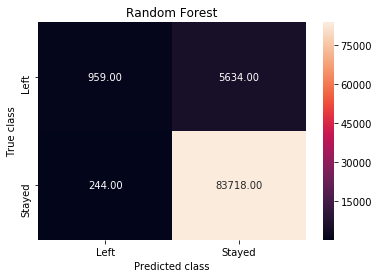

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
y_p = rf.predict(X_train)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = confusion_matrix(y_train,y_p, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

### BOOSTING WITH ADABOOST

In [124]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(rf, n_estimators=30)

In [125]:
adares = ada.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    2.5s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    1.7s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]

[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]

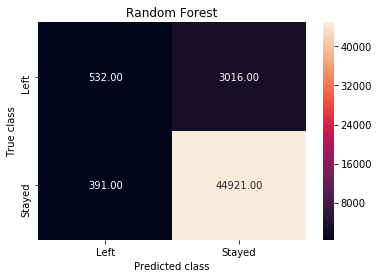

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
y_p = ada.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = confusion_matrix(y_test,y_p, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_p))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     45312
          1       0.58      0.15      0.24      3548

avg / total       0.91      0.93      0.91     48860



### 10-fold Cross validation with RF classifier

In [132]:
# CROSS VALIDATION
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.175


# Save en load en gebruik model

#### Save en load met joblib 

In [142]:
from sklearn.externals import joblib
joblib.dump(rf, 'RFmodelING.pkl') 

['RFmodelING.pkl']

In [143]:
from sklearn.externals import joblib
rf = joblib.load('RFmodelING.pkl') 

In [184]:
X["burgst_10.0"] = 0

##### Make prediction

In [149]:
P = classy.predict(X)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


In [150]:
print("P Shape %s" %(P.shape))
print ("P type %s"% (type(P)))

P Shape 54547
P type <class 'numpy.ndarray'>


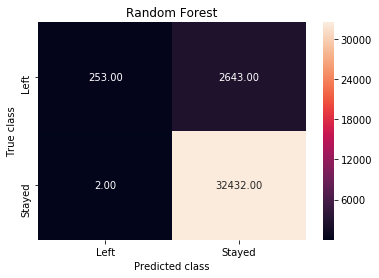

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred = rf.predict(X)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = confusion_matrix(y ,y_pred, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y, rf.predict(X)))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     32434
          1       0.99      0.09      0.16      2896

avg / total       0.93      0.93      0.90     35330



In [187]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf).fit(X, y)
eli5.explain_weights(perm)

Weight,Feature
0.0110 ± 0.0003,x84
0.0008 ± 0.0001,x27
0.0001 ± 0.0001,x77
0.0001 ± 0.0002,x21
0.0001 ± 0.0001,x1
0.0001 ± 0.0000,x68
0.0001 ± 0.0001,x42
0.0001 ± 0.0000,x98
0.0001 ± 0.0000,x66
0.0000 ± 0.0000,x2


In [152]:
P= np.asmatrix(P)

In [182]:
X.dtypes

groep                    int64
basisloon              float64
opslag                 float64
iopslag                float64
acturen                float64
aantrszd               float64
ziekte                 float64
prestatieuren          float64
overuren               float64
AO                     float64
ongewettigd            float64
gewettigd              float64
kindtl                 float64
opleidingsuren         float64
thuisuren              float64
aantalwknkpl           float64
gemuit                 float64
ggemloon               float64
gemact                 float64
aantalwkn                int64
anc                    float64
leeftijd               float64
fiets                  float64
openb                  float64
carpool                float64
eigen                  float64
bedrwagen              float64
verantw                  int64
ggemprestatie          float64
ggemthuisuren          float64
ggemoveruren           float64
ggemgewettigd          float64
ggemonge

In [183]:
X_test.dtypes

groep                    int64
basisloon              float64
opslag                 float64
iopslag                float64
acturen                float64
aantrszd               float64
ziekte                 float64
prestatieuren          float64
overuren               float64
AO                     float64
ongewettigd            float64
gewettigd              float64
kindtl                 float64
opleidingsuren         float64
thuisuren              float64
aantalwknkpl           float64
gemuit                 float64
ggemloon               float64
gemact                 float64
aantalwkn                int64
anc                    float64
leeftijd               float64
fiets                  float64
openb                  float64
carpool                float64
eigen                  float64
bedrwagen              float64
verantw                  int64
ggemprestatie          float64
ggemthuisuren          float64
ggemoveruren           float64
ggemgewettigd          float64
ggemonge

In [155]:
P= P.transpose()

In [157]:
P.shape

(54547, 1)

In [158]:
pp= pd.DataFrame(P, columns = ['pred']) # Cast naar dataframe

In [159]:
dd.shape

(54547, 52)

In [160]:
dd.reset_index(drop=True, inplace=True)
pp.reset_index(drop=True, inplace=True)

In [161]:
 result = pd.concat([dd, pp], axis=1)

In [162]:
result.head(10)

,pkwkn,ab,taal,scholi,geslacht,nat,hierstat,SOORTLOON,basisloon,opslag,...,fncwissel,ploeg,afstand,verschilafstand,gemopslag,gemleeftijd,gemanc,gemafstand,uit,pred
0,345600010000246,A,N,SL,M,B,A,UL,16.2,0.1413,...,0.0,12.0,12.0,0.0,0.309194,15199.192308,6428.673077,12.158824,0,0
1,345600010000400,A,N,LO,M,B,A,UL,12.2,0.1067,...,0.0,11.0,8.0,0.0,0.227250,17867.800000,3064.400000,7.380000,0,0
2,345600010000429,A,N,SL,M,B,A,UL,15.6,0.1357,...,0.0,82.0,6.0,0.0,0.175528,18081.277778,8816.833333,11.816667,0,0
3,345600010000452,A,N,SH,M,B,A,UL,15.9,0.1610,...,0.0,26.0,7.0,0.0,0.218527,16947.066667,6844.266667,7.964286,0,0
4,345600010000474,A,N,SH,M,B,A,UL,16.2,0.1770,...,0.0,25.0,3.0,0.0,0.218527,16947.066667,6844.266667,7.964286,0,0
5,345600010000480,A,N,SH,M,B,A,UL,15.2,0.2890,...,0.0,79.0,3.6,0.0,0.175528,18081.277778,8816.833333,11.816667,0,0
6,345600020000441,B,N,UN,M,B,B,ML,4344.3,400.2800,...,0.0,27.0,37.1,-0.9,147.853333,18190.666667,8280.333333,32.033333,0,0
7,345600020000464,B,N,HL,M,B,B,ML,4834.7,136.1500,...,0.0,23.0,3.5,0.0,83.790000,16445.500000,8418.500000,4.250000,0,0
8,345600010000557,A,N,LO,M,B,A,UL,15.2,0.3946,...,0.0,21.0,6.0,0.0,0.309194,15199.192308,6428.673077,12.158824,0,0
9,345600010000558,A,N,SH,M,B,A,UL,15.4,0.3823,...,0.0,25.0,4.0,0.0,0.218527,16947.066667,6844.266667,7.964286,0,0


In [598]:
result = result[result['pred']!=0]
result.to_csv('predictedperpkwkn.csv', sep=';')

# ROC Curve - model validation

In [169]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, rfe.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfe.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

ValueError: X has a different shape than during fitting.

### Print tree (enkel kleine trees)

In [154]:


import os

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from PIL import Image




In [155]:


tree_idx = 0
tree.export_graphviz(rf.estimators_[tree_idx], out_file="tree.dot") #  export dot file

# sudo apt install graphviz
os.system('dot -Tpng tree.dot -o tree.png')

Image.open('tree.png')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Grid search model optimalisatie

In [707]:

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
#digits = load_digits()
#X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=5, verbose = 1, n_jobs=-1)


# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [10,20,30,40,45],
              "max_features": sp_randint(4,25),
              "min_samples_split": [15,25,30,40],
              #"min_samples_leaf": [5,10,15],
              #"bootstrap": [False,True],
              "criterion": ["gini","entropy"]
             }
#n_estimators=100,  min_samples_split = 20, bootstrap=False, n_jobs=-1, verbose=1
# run randomized search
n_iter_search = 6
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_job

RandomizedSearchCV took 52.02 seconds for 6 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.969 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'min_samples_split': 25}

Model with rank: 2
Mean validation score: 0.969 (std: 0.000)
Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 21, 'min_samples_split': 40}

Model with rank: 3
Mean validation score: 0.968 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 18, 'min_samples_split': 40}

Model with rank: 4
Mean validation score: 0.968 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 40, 'max_features': 12, 'min_samples_split': 40}

Model with rank: 5
Mean validation score: 0.968 (std: 0.000)
Parameters: {'criterion': 'gini', 'max_depth': 45, 'max_features': 21, 'min_samples_split': 40}



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [35]:
dd=dd[dd['anc']!=43157]
dd=dd[dd['basisloon']<12000]
dd=dd[dd['opslag']<1500]

In [36]:
dd.columns.values

array(['pkwkn', 'ab', 'taal', 'scholi', 'basisloon', 'afstand', 'acturen',
       'aantrszd', 'prestatieuren', 'overuren', 'opleidingsuren',
       'aantzkt', 'opslag', 'anc', 'leeftijd', 'uit'], dtype=object)

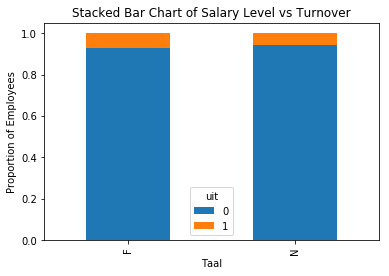

In [128]:
table=pd.crosstab(dd.taal, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Taal')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

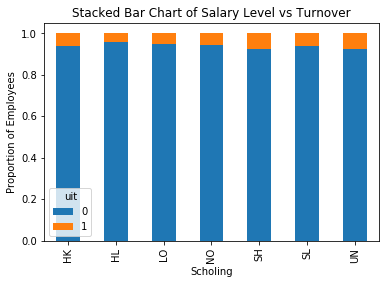

In [129]:
table=pd.crosstab(dd.scholi, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Scholing')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [44]:
LT=pd.cut(dd['leeftijd'],
      9, labels=["<20","<25","<30","<35","<40","<45","<50","<55","<60",])

In [45]:

bins = np.linspace(hr.leeftijd.min()/365, hr.leeftijd.max()/365, 10)
groups = hr.groupby(pd.cut(hr.leeftijd/365, bins))
print (groups.mean().leeftijd/365)

leeftijd
(19.693, 24.768]    23.624664
(24.768, 29.844]    27.761098
(29.844, 34.919]    32.599058
(34.919, 39.994]    37.585912
(39.994, 45.069]    42.629521
(45.069, 50.144]    47.412892
(50.144, 55.219]    52.711644
(55.219, 60.295]    57.334711
(60.295, 65.37]     62.272983
Name: leeftijd, dtype: float64


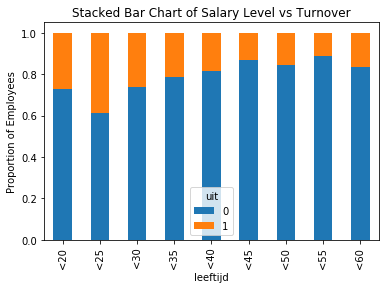

In [46]:
table=pd.crosstab(LT, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('leeftijd')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

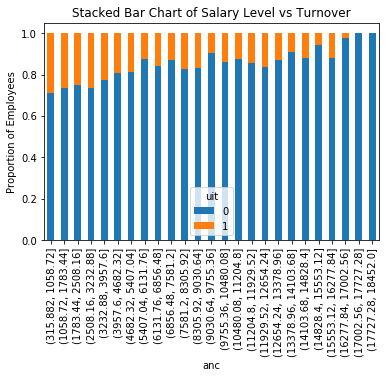

In [52]:
an=pd.cut(dd['anc'],
      25)


table=pd.crosstab(an, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('anc')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [48]:
dd['anc'].max()/365

50.553424657534244

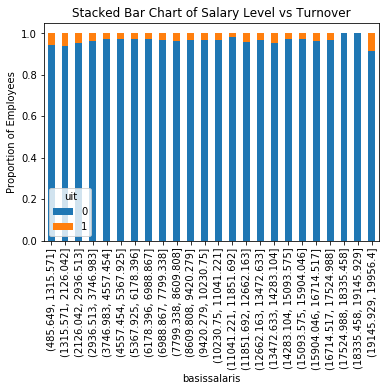

In [198]:
#bedienden
db=dd[dd['basisloon']>500]
an=pd.cut(db['basisloon'],
      24)
table=pd.crosstab(an, db.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('basissalaris')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

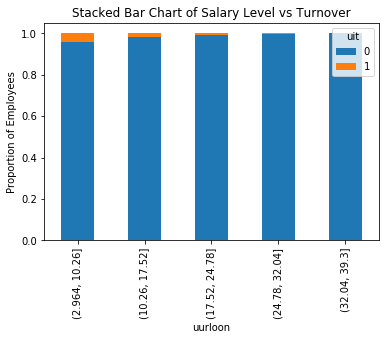

In [199]:
#arbeiders
db=dd[dd['basisloon']<50]
an=pd.cut(db['basisloon'],
      5)
table=pd.crosstab(an, db.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('uurloon')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

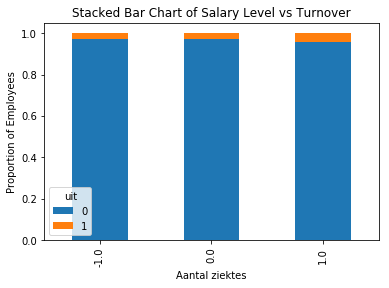

In [203]:
#aantal ziektes
table=pd.crosstab(dd.verantwissel, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Aantal ziektes')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

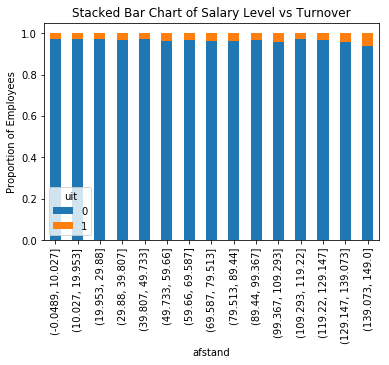

In [204]:
#arbeiders
db=dd[dd['afstand']<150]
an=pd.cut(db['afstand'], 15)
table=pd.crosstab(an, db.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('afstand')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [180]:
dd['prestatieuren'].median()

378.0

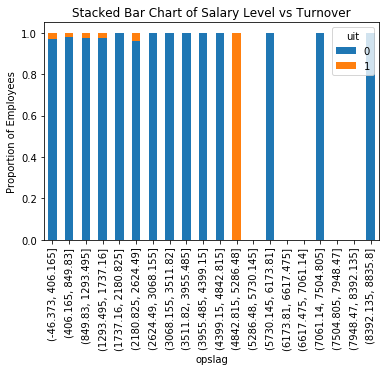

In [205]:
#overuren
db=dd[dd['voet']<7000]
an=pd.cut(db['overuren'], 20)
table=pd.crosstab(an, db.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('opslag')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

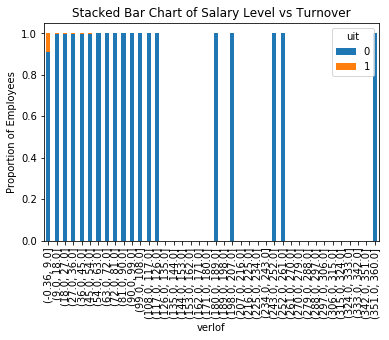

In [156]:
#acturen
dd = hr
an=pd.cut(dd['verlof'], 40)
table=pd.crosstab(an, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('verlof')
plt.ylabel('Proportion of Employees')
plt.savefig('v')

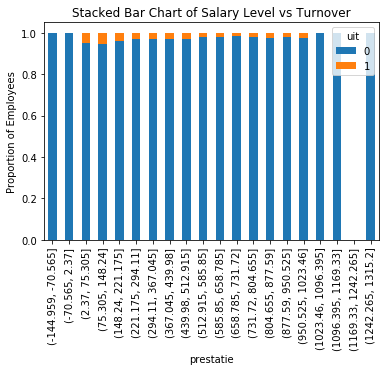

In [207]:
#prestatie
an=pd.cut(dd['prestatieuren'], 20)
table=pd.crosstab(an, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('prestatie')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

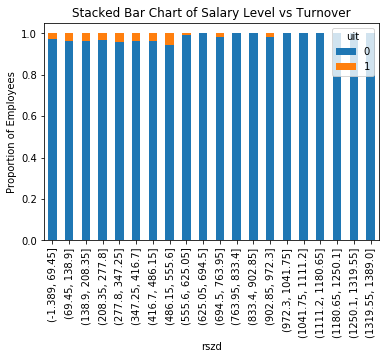

In [209]:
#ziekte
an=pd.cut(dd['ziekte'], 20)
table=pd.crosstab(an, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('rszd')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

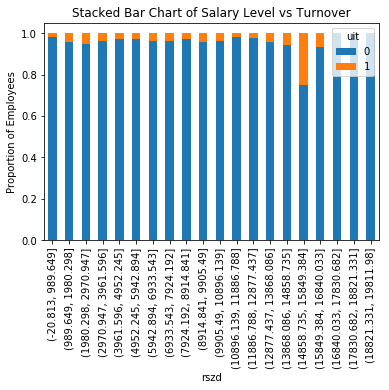

In [215]:
#gemloon
an=pd.cut(dd['gemloon'], 20)
table=pd.crosstab(an, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('rszd')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

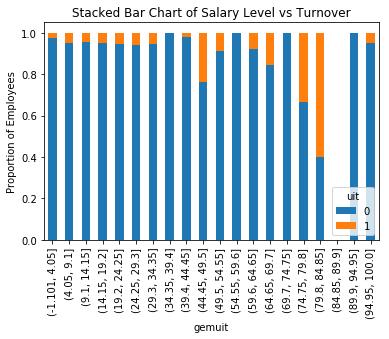

In [212]:
#gemuit
an=pd.cut(dd['gemuit'], 20)
table=pd.crosstab(an, dd.uit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('gemuit')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

,basisloon,opslag,acturen,aantrszd,ziekte,prestatieuren,overuren,AO,ongewettigd,gewettigd,burgst,kindtl,opleidingsuren,thuisuren,fietsuren,aantalwknkpl,gemuit,gemloon,gemact,aantalwkn,anc,leeftijd,voet,fiets,openb,carpool,eigen,bedrwagen,verantw,gemprestatie,gemthuisuren,gemoveruren,gemgewettigd,gemongewettigd,verantwissel,fncwissel,ploeg,afstand,verschilafstand,gemopslag,gemleeftijd,gemanc,gemafstand,basisuren,ab_A,ab_B,taal_D,taal_E,taal_F,taal_N,scholi_0,scholi_08,scholi_7J,scholi_A2,scholi_A3,scholi_AS,scholi_AV,scholi_BO,scholi_BS,scholi_BU,scholi_DE,scholi_DI,scholi_DL,scholi_F,scholi_HK,scholi_HL,scholi_HS,scholi_LC,scholi_LO,scholi_LS,scholi_NO,scholi_PA,scholi_SH,scholi_SL,scholi_SP,scholi_TE,scholi_TS,scholi_UN,scholi_ZD,scholi_ZH,scholi_ZK,scholi_ZL,scholi_ZS,geslacht_M,geslacht_V,hierstat_A,hierstat_B,hierstat_D,hierstat_H,hierstat_I,hierstat_K,hierstat_L,hierstat_M,soortloon_,soortloon_DL,soortloon_ML,soortloon_UL,aardcont_BD,aardcont_BW,aardcont_OD,aardcont_VC
uit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2287.181803,46.144619,35.604890,65.433745,24.982906,413.395019,46.647771,0.936014,0.035235,1.889942,2.144704,0.707230,4.049588,3.988847,61.809412,123.129765,1.869309,2266.801506,92.224966,3472.075718,5740.667266,16099.198369,0.002066,2.782132,0.649510,1.050773,0.0,7.173252,1.0,407.122757,4.599857,60.302706,1.958921,0.055961,-0.368384,-0.393858,94.255093,23.667996,-0.005169,56.220576,16064.600043,5700.416439,23.699468,36.546920,0.394593,0.605407,0.000200,0.000005,0.240294,0.759502,0.000005,0.000014,0.000086,0.000045,0.000014,0.000281,0.000086,0.000104,0.000064,0.000032,0.000014,0.000191,0.000068,0.000009,0.155769,0.050294,0.001053,0.000027,0.026821,0.000449,0.271316,0.000014,0.287698,0.083408,0.000018,0.000014,0.000064,0.121712,0.000041,0.000045,0.000027,0.000181,0.000036,0.715772,0.284228,0.394593,0.410023,0.009554,0.012544,0.000082,0.142282,0.006011,0.024911,0.000113,0.002790,0.605543,0.391553,0.029312,0.000064,0.969091,0.001533
1,2656.796349,53.479576,35.927258,64.316153,29.511345,394.708009,37.102014,1.376093,0.169707,3.138512,1.976409,0.583321,2.327303,5.407348,42.309091,97.135237,3.113986,2759.795168,92.869274,3818.989031,3170.227047,13862.560631,0.003806,1.174111,1.085994,0.531699,0.0,9.062585,1.0,404.020174,5.927369,52.607079,2.214676,0.090250,-0.355372,-0.405710,102.579564,25.544688,0.224553,77.891930,15101.126422,4428.140221,24.294446,36.384977,0.224493,0.775507,0.000751,0.000000,0.240571,0.758678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000301,0.000150,0.000000,0.000150,0.000000,0.000000,0.000000,0.000150,0.170999,0.056799,0.000000,0.000000,0.012622,0.000000,0.319760,0.000000,0.201953,0.041022,0.000150,0.000000,0.000000,0.195793,0.000000,0.000000,0.000000,0.000000,0.000000,0.648986,0.351014,0.224493,0.558377,0.011420,0.008565,0.000301,0.167393,0.004808,0.024643,0.000000,0.000451,0.776709,0.222840,0.039669,0.000150,0.958678,0.001503


### SVC model

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

In [43]:
X_test.dtypes

basisloon         float64
opslag            float64
acturen           float64
aantrszd          float64
ziekte            float64
prestatieuren     float64
overuren          float64
AO                float64
ongewettigd       float64
gewettigd         float64
burgst             object
kindtl            float64
opleidingsuren    float64
thuisuren         float64
fietsuren         float64
aantalwknkpl      float64
gemuit            float64
gemloon           float64
gemact            float64
aantalwkn           int64
anc               float64
leeftijd          float64
voet              float64
fiets             float64
openb             float64
carpool           float64
eigen             float64
bedrwagen         float64
verantw             int64
gemprestatie      float64
                   ...   
scholi_HS           uint8
scholi_LC           uint8
scholi_LO           uint8
scholi_LS           uint8
scholi_NO           uint8
scholi_PA           uint8
scholi_SH           uint8
scholi_SL   

NameError: name 'plt' is not defined

In [2]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np



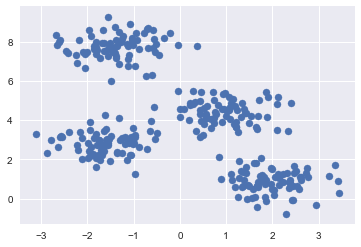

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [7]:
type(X)

numpy.ndarray

In [7]:
print(col_names)


['uit', 'UITMAAND', 'UITKWARTAAL', 'pkwkn', 'ab', 'taal', 'scholi', 'geslacht', 'nat', 'hierstat', 'soortloon', 'aardcont', 'basisloon', 'opslag', 'acturen', 'aantrszd', 'ziekte', 'prestatieuren', 'overuren', 'AO', 'ongewettigd', 'gewettigd', 'burgst', 'kindtl', 'opleidingsuren', 'thuisuren', 'fietsuren', 'aantalwknkpl', 'gemuit', 'ggemloon', 'gemact', 'aantalwkn', 'anc', 'leeftijd', 'voet', 'fiets', 'openb', 'carpool', 'eigen', 'bedrwagen', 'verantw', 'ggemprestatie', 'ggemthuisuren', 'ggemoveruren', 'ggemgewettigd', 'ggemongewettigd', 'verantwissel', 'fncwissel', 'afstand', 'verschilafstand', 'ggemopslag', 'ggemleeftijd', 'ggemanc', 'ggemafstand', 'basisuren', 'ggemziekte', 'gemvarprestatieuren', 'gemvarziekte', 'gemvaroveruren', 'gemvarthuisuren', 'gemvaropslag', 'gemvarleeftijd', 'gemvaranc', 'gemvarafstand', 'verprestatieuren', 'verziekte', 'verongewettigd', 'vergewettigd', 'veroveruren', 'verthuisuren', 'veropslag', 'verleeftijd', 'veranc', 'verafstand', 'veraantalwkn', 'ffncpres

In [76]:
#hr['maxverlof'].value_counts()